In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#print versions
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
print("Matplotlib Version:", matplotlib.__version__)
print("Scikit-learn Version:", sklearn.__version__)

Pandas version: 2.2.2
Numpy version: 2.0.2
Seaborn version: 0.13.2
Matplotlib Version: 3.10.0
Scikit-learn Version: 1.6.1


In [ ]:
#Path
DATA_PATH = "/kaggle/2022_Q1_OR_Utilization.xlsx"

#Load the dataset
df = pd.read_excel(DATA_PATH)

#Display df
df.head()



,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
0,10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,2022-01-03 09:05:00,2022-01-03 09:17:00
1,10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,2022-01-03 11:01:00,2022-01-03 11:12:00
2,10003,2022-01-03,1,Podiatry,28297,Lapidus bunionectomy,150,2022-01-03 10:00:00,2022-01-03 11:50:00,2022-01-03 12:20:00,2022-01-03 12:42:00,2022-01-03 12:58:00
3,10004,2022-01-03,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,2022-01-03 12:45:00,2022-01-03 13:29:00,2022-01-03 13:53:00,2022-01-03 14:50:00,2022-01-03 15:02:00
4,10005,2022-01-03,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-01-03 07:00:00,2022-01-03 07:15:00,2022-01-03 07:50:00,2022-01-03 09:38:00,2022-01-03 09:51:00


In [ ]:
#Columns
datetime_cols = ["OR Schedule", "Wheels In", "Start Time", "End Time", "Wheels Out", "Date"]
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
df["Case_Duration_Min"] = (df["Wheels Out"] - df["Wheels In"]).dt.total_seconds() / 60.0
df["OR_Time_Min"] = (df["End Time"] - df["Start Time"]).dt.total_seconds() / 60.0

#df Check
df[["Case_Duration_Min", "OR_Time_Min"]].describe()


,Case_Duration_Min,OR_Time_Min
count,2172.000000,2172.000000
mean,79.697053,45.475138
std,31.822390,26.742297
min,19.000000,12.000000
25%,62.000000,28.000000
50%,73.000000,35.000000
75%,96.000000,58.000000
max,173.000000,136.000000


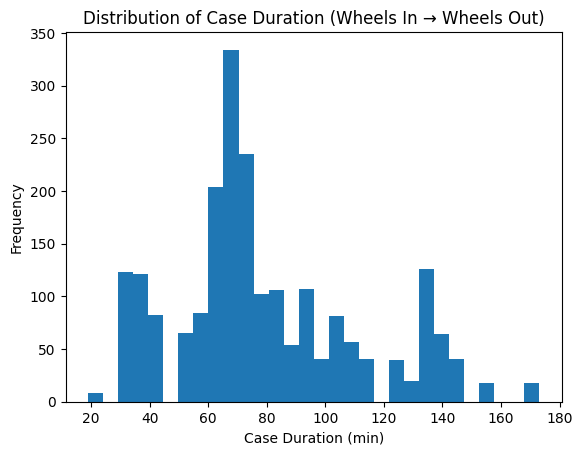

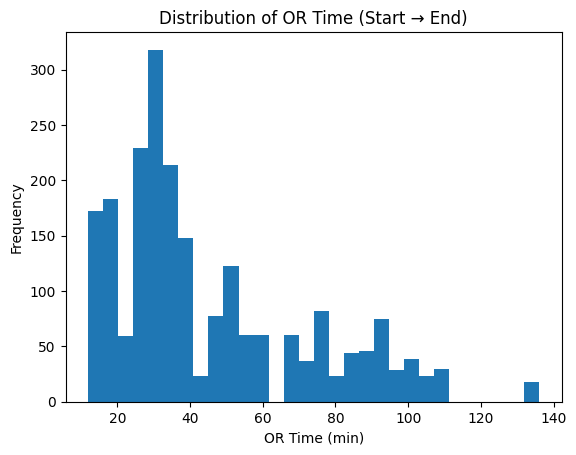

Shortest cases:


,Encounter ID,Service,CPT Code,Case_Duration_Min
1512,11513,Ophthalmology,66982,19.0
1514,11515,Ophthalmology,66982,19.0
982,10983,Ophthalmology,66982,19.0
972,10973,Ophthalmology,66982,20.0
1513,11514,Ophthalmology,66982,22.0



Longest cases:


,Encounter ID,Service,CPT Code,Case_Duration_Min
643,10644,Plastic,15773,173.0
2019,12020,Plastic,15773,173.0
23,10024,Plastic,15773,173.0
2124,12125,Plastic,15773,173.0
1561,11562,Plastic,15773,173.0


In [ ]:
#EDA
plt.figure()
plt.hist(df["Case_Duration_Min"].dropna(), bins=30)
plt.xlabel("Case Duration (min)")
plt.ylabel("Frequency")
plt.title("Distribution of Case Duration (Wheels In → Wheels Out)")
plt.show()

plt.figure()
plt.hist(df["OR_Time_Min"].dropna(), bins=30)
plt.xlabel("OR Time (min)")
plt.ylabel("Frequency")
plt.title("Distribution of OR Time (Start → End)")
plt.show()

df_sorted = df.sort_values("Case_Duration_Min")
print("Shortest cases:")
display(df_sorted.head(5)[["Encounter ID", "Service", "CPT Code", "Case_Duration_Min"]])

print("\nLongest cases:")
display(df_sorted.tail(5)[["Encounter ID", "Service", "CPT Code", "Case_Duration_Min"]])

In [ ]:
#Preprocessing
categorical_cols = ["OR Suite", "Service", "CPT Code"]
for col in categorical_cols:
    X[col] = X[col].astype(str)

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_encoded.head()

,Sched_Hour,Sched_DayOfWeek,OR Suite_2,OR Suite_3,OR Suite_4,OR Suite_5,OR Suite_6,OR Suite_7,OR Suite_8,Service_General,...,CPT Code_47562,CPT Code_52353,CPT Code_55250,CPT Code_55873,CPT Code_57460,CPT Code_58562,CPT Code_64721,CPT Code_66982,CPT Code_69421,CPT Code_69436
0,7,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Select Features
df["Sched_Datetime"] = pd.to_datetime(df["OR Schedule"])
df["Sched_Hour"] = df["Sched_Datetime"].dt.hour
df["Sched_DayOfWeek"] = df["Sched_Datetime"].dt.dayofweek  # Monday=0

feature_cols = [
    "Sched_Hour",
    "Sched_DayOfWeek",
    "OR Suite",
    "Service",
    "CPT Code",
]

target_col = "Case_Duration_Min"

model_df = df.dropna(subset=[target_col]).copy()

X = model_df[feature_cols].copy()
y = model_df[target_col].copy()

X.head()


,Sched_Hour,Sched_DayOfWeek,OR Suite,Service,CPT Code
0,7,0,1,Podiatry,28110
1,8,0,1,Podiatry,28055
2,10,0,1,Podiatry,28297
3,12,0,1,Podiatry,28296
4,7,0,2,Orthopedics,27445


In [ ]:
#80/20 splitage
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1737, 49), (435, 49))

In [ ]:
def evaluate_regression(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name}!!!!")
    print(f"MAE : {mae:,.2f} minutes")
    print(f"RMSE: {rmse:,.2f} minutes")
    print(f"R²  : {r2:,.3f}")

    return {"model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}


In [ ]:
#Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
metrics_lin = evaluate_regression(y_test, y_pred_lin, model_name="Linear Regression")

Linear Regression!!!!
MAE : 4.87 minutes
RMSE: 7.46 minutes
R²  : 0.943


In [ ]:
#SVR Model
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svr = SVR(kernel="rbf", C=100, gamma=0.1)
svr.fit(X_train_s, y_train)
y_pred_svr = svr.predict(X_test_s)
metrics_svr = evaluate_regression(y_test, y_pred_svr, "SVR")

SVR!!!!
MAE : 1.35 minutes
RMSE: 4.84 minutes
R²  : 0.976


In [ ]:
#Gradient Booster
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
metrics_gbr = evaluate_regression(y_test, y_pred_gbr, model_name="Gradient Boosting Regressor")


Gradient Boosting Regressor!!!!
MAE : 4.41 minutes
RMSE: 5.82 minutes
R²  : 0.966


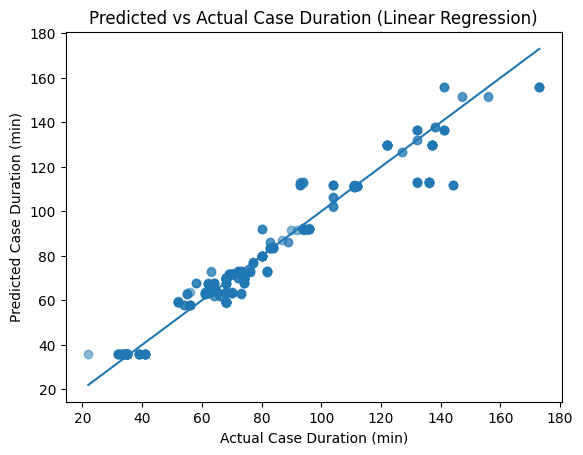

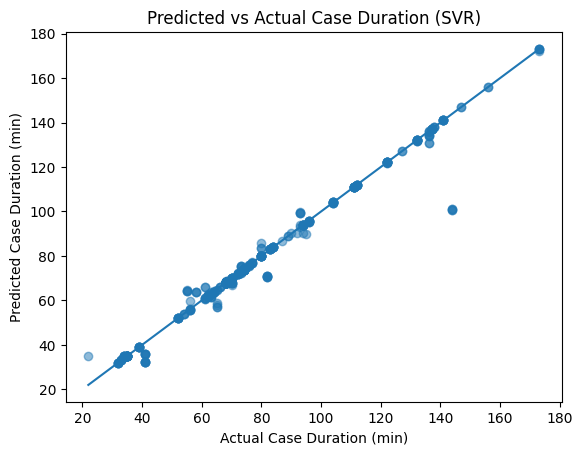

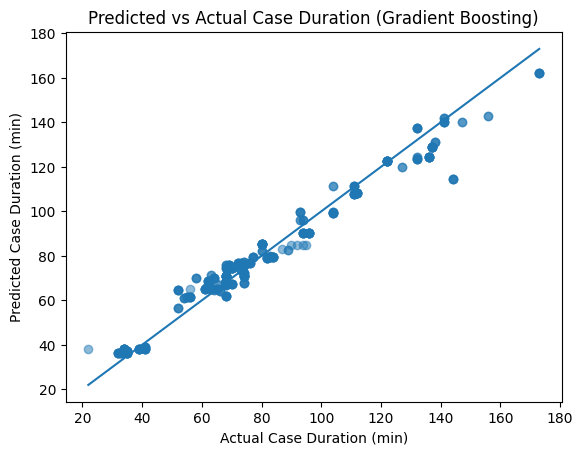

In [ ]:
#Model Performance Charts
models = {
    "Linear Regression": y_pred_lin,
    "SVR": y_pred_svr,
    "Gradient Boosting": y_pred_gbr
}

for model_name, preds in models.items():
    plt.figure()
    plt.scatter(y_test, preds, alpha=0.5)
    plt.xlabel("Actual Case Duration (min)")
    plt.ylabel("Predicted Case Duration (min)")
    plt.title(f"Predicted vs Actual Case Duration ({model_name})")

    min_val = min(y_test.min(), preds.min())
    max_val = max(y_test.max(), preds.max())
    plt.plot([min_val, max_val], [min_val, max_val])

    plt.show()

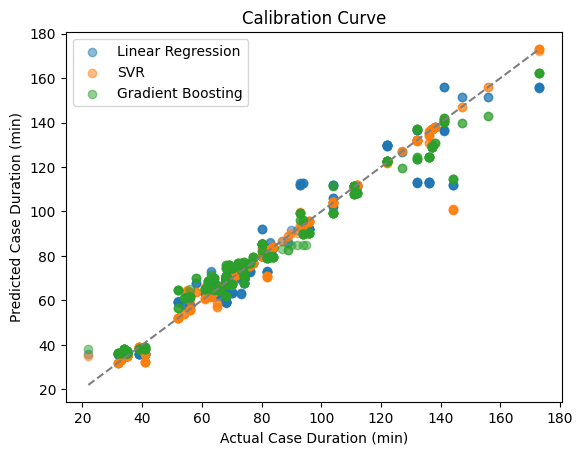

In [ ]:
#Calibration Curve
plt.figure()
plt.scatter(y_test, y_pred_lin, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_svr, alpha=0.5, label="SVR")
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label="Gradient Boosting")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="gray")
plt.xlabel("Actual Case Duration (min)")
plt.ylabel("Predicted Case Duration (min)")
plt.title("Calibration Curve")
plt.legend()
plt.show()


In [ ]:
#Model Eval
metrics_df = pd.DataFrame([metrics_lin, metrics_svr, metrics_gbr])
metrics_df.set_index("model", inplace=True)
metrics_df

,MAE,RMSE,R2
model,,,
Linear Regression,4.865476,7.464952,0.943455
SVR,1.349986,4.841695,0.976213
Gradient Boosting Regressor,4.410735,5.823399,0.965590


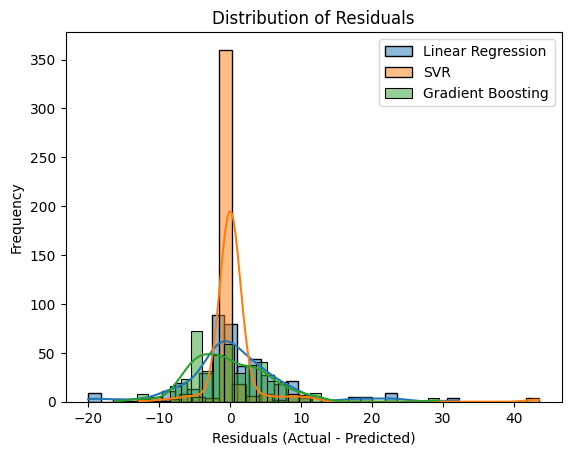

In [ ]:
#Error Distribution Plot
plt.figure()
sns.histplot(y_test - y_pred_lin, bins=30, kde=True, label="Linear Regression")
sns.histplot(y_test - y_pred_svr, bins=30, kde=True, label="SVR")
sns.histplot(y_test - y_pred_gbr, bins=30, kde=True, label="Gradient Boosting")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()